In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline

In [2]:
data1 = pd.read_excel("output_x_1e-3.xlsx",sheet_name=0)
data2 = pd.read_excel("output_x_1e-2.xlsx",sheet_name=0)
data3 = pd.read_excel("output_x_2e-2.xlsx",sheet_name=0)
data = [data1, data2, data3]

In [3]:
data[0].head()

,c,p_u,on_demand_u,off_demand_u,pi_u,pon,poff,on_demand_d,show_demand_d,off_demand_d,pi_d
0,0.1000,0.4000,0.0,0.4000,0.040000,0.3525,0.4000,0.0,0,0.4000,0.040000
1,0.1025,0.3975,0.0,0.3975,0.039502,0.3500,0.3975,0.0,0,0.3975,0.039502
2,0.1050,0.3950,0.0,0.3950,0.039006,0.3475,0.3950,0.0,0,0.3950,0.039006
3,0.1075,0.3925,0.0,0.3925,0.038514,0.3450,0.3925,0.0,0,0.3925,0.038514
4,0.1100,0.3900,0.0,0.3900,0.038025,0.3425,0.3900,0.0,0,0.3900,0.038025


In [4]:
max(data1.c)

0.1800000000000001

In [10]:
def plot(data,xs, fz=(20,8)):
    fig,axes = plt.subplots(2, len(data),sharex='col', sharey='row',figsize=fz)
    fig.subplots_adjust(hspace=0.6, wspace=0.4)
    for j,current_data  in enumerate(data):
        sel_c = current_data["c"]
        min_c_ind = min(sel_c)
        max_c_ind = max(sel_c)
        step = sel_c[1]-sel_c[0]

        sel_prices_u = current_data["p_u"]
        sel_prices_d_on =  current_data["pon"]
        sel_prices_d_off =  current_data["poff"]


        axes[0,j].plot(sel_c, sel_prices_u,c='red', ls='--', ms=6, marker='^', markerfacecolor='none',label="Uniform")
        axes[0,j].plot(sel_c, sel_prices_d_on, c='blue', ls='--', ms=6, marker='o',  markerfacecolor='none',label="Online of Dual")
        axes[0,j].plot(sel_c, sel_prices_d_off, c='green', ls='--', ms=6, marker='D',
                 markerfacecolor='none',label="Offline of Dual")

        axes[0,j].legend(prop=dict(size=12), frameon=False)

        #axes[0,j].set_xlabel("c", fontsize =16)

        axes[0,j].set_title(r"$x$={} ".format(xs[j]), fontsize=22)
        axes[0,j].set_xlim((0.1,0.17))
        axes[0,j].set_ylim((0.28,0.46))
        
        for label in (axes[0,j].get_xticklabels() + axes[0,j].get_yticklabels()):
            label.set_fontsize(16)

        sel_profits_u = current_data["pi_u"]
        sel_profits_d = current_data["pi_d"]

        axes[1,j].plot(sel_c, sel_profits_u,c='red', ls='--', ms=6, marker='^', markerfacecolor='none', label="Uniform")
        axes[1,j].plot(sel_c, sel_profits_d,c='blue', ls='--', ms=6, marker='o',markerfacecolor='none',label="Dual")

        axes[1,j].legend(prop=dict(size=12), frameon=False)
        axes[1,j].set_ylim((0.03,0.042))
        axes[1,j].set_xlim((0.1,0.17))
        
        for label in (axes[1,j].get_xticklabels() + axes[1,j].get_yticklabels()):
            label.set_fontsize(16)
    axes[0,0].set_ylabel("Prices", fontsize =22)
    axes[1,0].set_ylabel("Profits", fontsize =22)
    fig.text(0.5, 0, 'c', ha='center',fontsize =22)
    fig.tight_layout()
    return fig

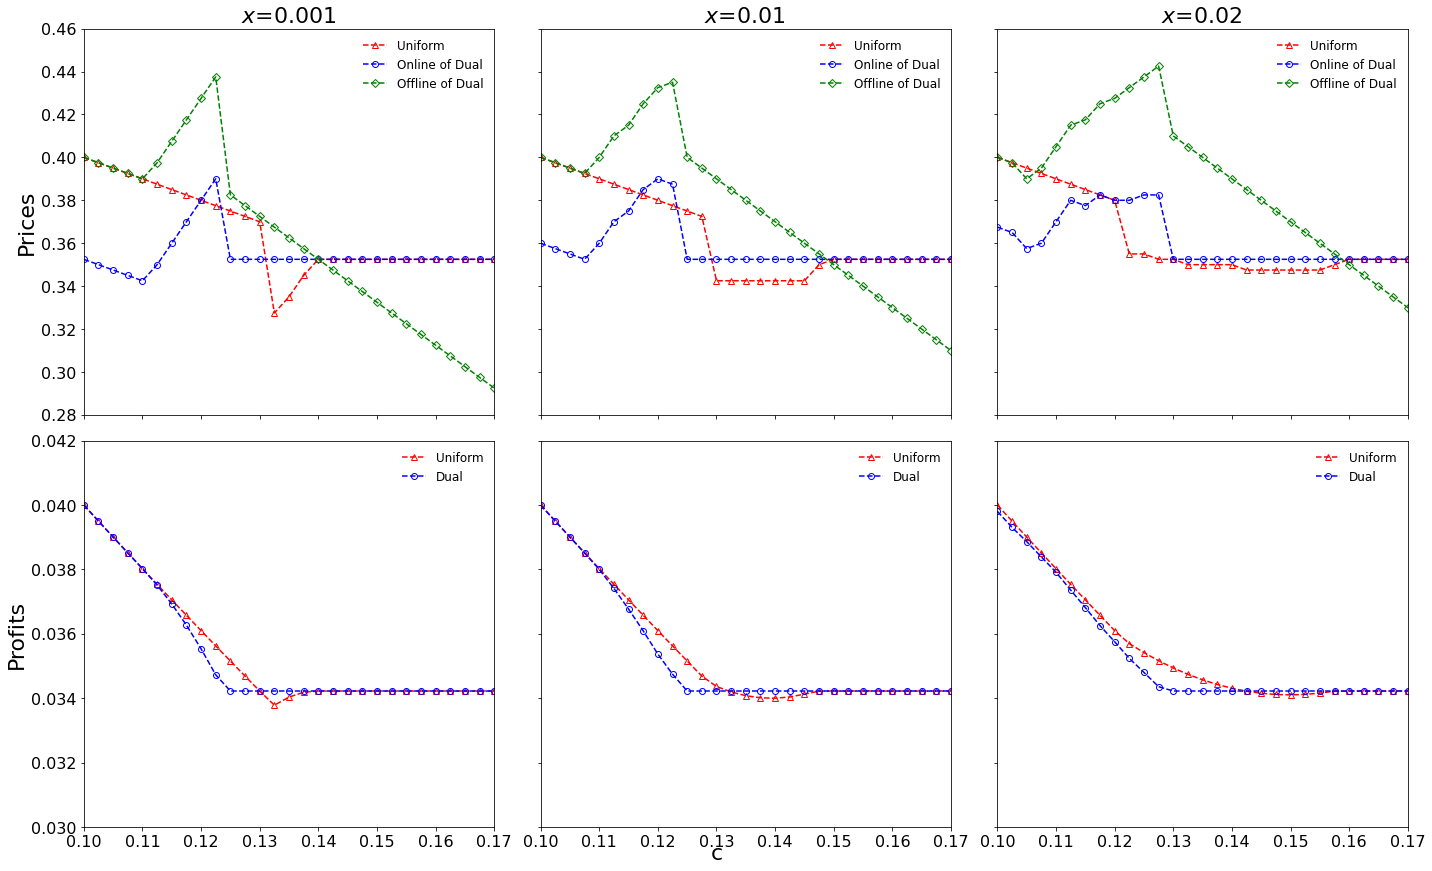

In [11]:
myfig = plot(data,xs=[0.001,0.01,0.02], fz=(20,12))

In [12]:
myfig.savefig("C:/Users/admin/Desktop/managing multi-rooming/round 3/HetergenousOnlineCosts.pdf")